In [1]:
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt 


In [2]:
model = tf.keras.models.load_model('trained_model.keras')

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                   

## Visualizing Single Image of Test Set

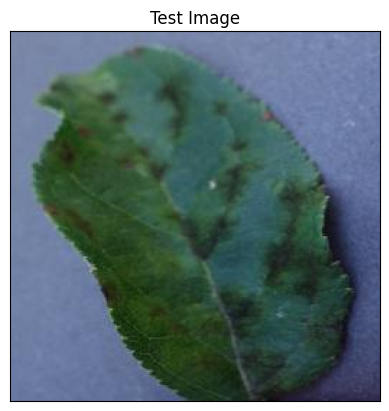

In [4]:
import cv2
image_path = "test/AppleScab2.JPG"

## Reading Image
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

## Display Image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [6]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128)) 
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr]) ##converting single image into batch
print(input_arr.shape)

(1, 128, 128, 3)


In [7]:
prediction = model.predict(input_arr)
prediction,prediction.shape

1/1 [==============================] - 1s 596ms/step


(array([[8.3786976e-01, 1.3208812e-13, 1.2831700e-14, 1.6213009e-01,
         2.5388197e-10, 3.1851429e-12, 1.0920715e-15, 1.1972312e-13,
         5.5487414e-17, 4.8861519e-16, 3.4030137e-15, 4.0894412e-14,
         3.8628001e-17, 1.2972275e-16, 5.6934292e-17, 4.1233440e-12,
         1.3692242e-07, 2.8314975e-13, 1.2768890e-13, 4.6869029e-11,
         1.5646523e-10, 1.2936339e-10, 1.9868577e-12, 9.5027525e-16,
         2.0621693e-13, 5.2894792e-13, 1.2412012e-13, 7.0637390e-10,
         2.7535931e-17, 2.2901077e-11, 2.0029955e-15, 2.9314147e-09,
         2.3381216e-13, 6.7447857e-16, 1.9418141e-15, 5.2192492e-16,
         1.7721193e-16, 1.4267830e-14]], dtype=float32),
 (1, 38))

In [8]:
result_index= np.argmax(prediction)
result_index

0

In [9]:
class_name = ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

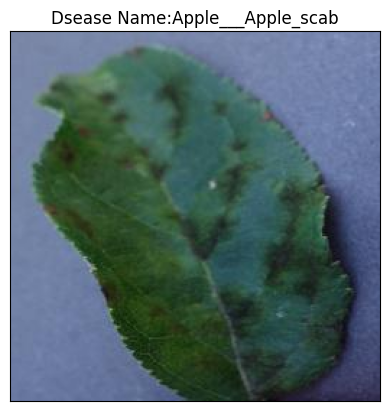

In [10]:
#displaying result of disease prediction
model_predicton=class_name[result_index]
plt.imshow(img)
plt.title(f'Dsease Name:{model_predicton}')
plt.xticks([])
plt.yticks([])
plt.show()
